In [6]:
#load necessary libraries
import pandas as pd 

In [7]:
#load dataset
df = pd.read_csv(r'E:\Projects\E-Commerce Data\Data.csv')
print(df.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [8]:
#Average Customer Rating for Each Mode of Shipment
avg_rating = df.groupby('Mode_of_Shipment')['Customer_rating'].mean()
print(round(avg_rating,2))

Mode_of_Shipment
Flight    2.98
Road      3.00
Ship      2.99
Name: Customer_rating, dtype: float64


In [9]:
# Calculating the correlation coefficient
correlation = df['Customer_care_calls'].corr(df['Customer_rating'])
print(f"Correlation between Customer Care Calls and Ratings: {correlation:.2f}")

Correlation between Customer Care Calls and Ratings: 0.01


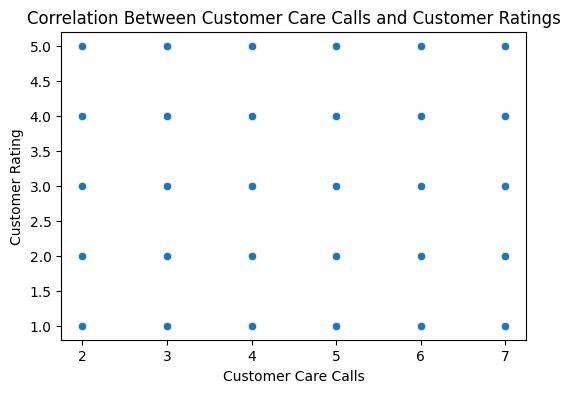

In [10]:
# Scatter plot to visualize the correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Customer_care_calls', y='Customer_rating')
plt.title('Correlation Between Customer Care Calls and Customer Ratings')
plt.xlabel('Customer Care Calls')
plt.ylabel('Customer Rating')
plt.show()

In [11]:
# Comparing average discount for products that reached on time vs. not on time
average_discount = df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()

print("Average Discount Offered Based on On-Time Delivery:")
print(average_discount)

Average Discount Offered Based on On-Time Delivery:
Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64


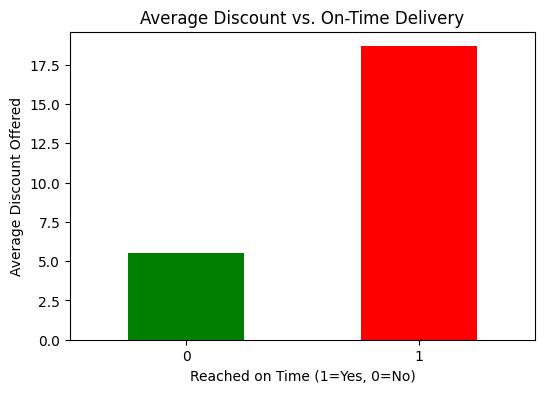

In [12]:
# Plotting the results
plt.figure(figsize=(6, 4))
average_discount.plot(kind='bar', color=['green', 'red'])
plt.title('Average Discount vs. On-Time Delivery')
plt.xlabel('Reached on Time (1=Yes, 0=No)')
plt.ylabel('Average Discount Offered')--
plt.xticks(rotation=0)
plt.show()

In [14]:
# Calculating percentage of on-time deliveries for each mode of shipment
on_time_percentage = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean() * 100
print(on_time_percentage)

Mode_of_Shipment
Flight    60.157569
Road      58.806818
Ship      59.756098
Name: Reached.on.Time_Y.N, dtype: float64


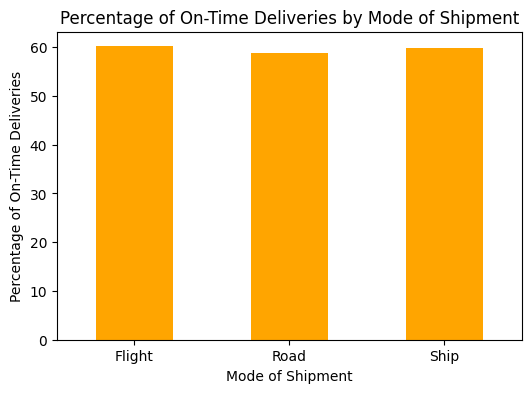

In [15]:
# Plotting the results
plt.figure(figsize=(6, 4))
on_time_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of On-Time Deliveries by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Percentage of On-Time Deliveries')
plt.xticks(rotation=0)
plt.show()

In [16]:
#Customer_rating correlate with the Cost_of_the_Product and Discount_offered
correlation_rating_cost = df['Customer_rating'].corr(df['Cost_of_the_Product'])
correlation_rating_discount = df['Customer_rating'].corr(df['Discount_offered'])
print(f'Correlation between Customer Rating and Cost of the Product: {correlation_rating_cost}')
print(f'Correlation between Customer Rating and Discount Offered: {correlation_rating_discount}')


Correlation between Customer Rating and Cost of the Product: 0.009269524580023579
Correlation between Customer Rating and Discount Offered: -0.003124443913313975


In [19]:
#mpact of  Warehouse_block on the on-time delivery
warehouse_on_time_rate = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].mean() * 100
print(f'On-time delivery rate by Warehouse Block:\n{warehouse_on_time_rate}')

On-time delivery rate by Warehouse Block:
Warehouse_block
A    58.647027
B    60.229133
C    59.683579
D    59.760087
F    59.847245
Name: Reached.on.Time_Y.N, dtype: float64
